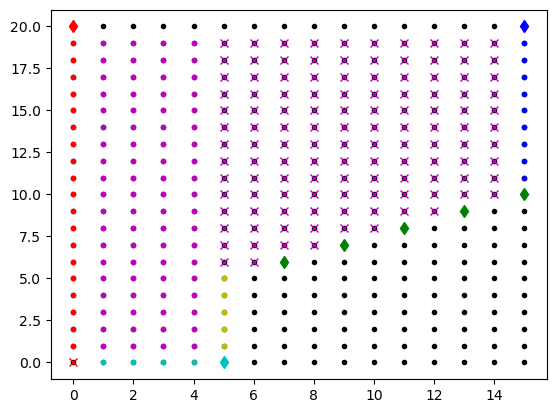

In [77]:
#  Este código es útil para resolver la ecuación de laplace con condiciones de dirichlet y neumman
import numpy as np
import matplotlib.pyplot as plt
# Figura a resolver
dx = dy = 1
Lx = 15
Ly = 20
Nx = int(Lx/dx + 1) # nodos en x
Ny = int(Ly/dy + 1) # nodos en y

x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)

# Malla de puntos
X,Y = np.meshgrid(x,y)

plt.plot(X,Y,'.k')

for i in range(Nx):
    for j in range(Ny):
        if i == 0 and j!=0 and j!=Ny-1:
            plt.plot(X[j,i],Y[j,i],'.r')
        elif i == 0 and j==0:
             plt.plot(X[j,i],Y[j,i],'xr')
        elif i == 0 and j==Ny-1:
             plt.plot(X[j,i],Y[j,i],'dr')
        elif j==0 and i>0 and i < 5/dx:
            plt.plot(X[j,i],Y[j,i],'.c')
        elif j==0 and i == 5/dx:
            plt.plot(X[j,i],Y[j,i],'dc')
        elif i == Nx-1 and j == Ny-1:
            plt.plot(X[j,i],Y[j,i],'db')
        elif i == Nx-1 and j > 10/dy and j < Ny-1:
            plt.plot(X[j,i],Y[j,i],'.b')
        elif i == 5/dx and j > 0 and j <= 5/dy:
            plt.plot(X[j,i],Y[j,i],'.y')
        elif j == (i-5/dx)*dx/(2*dy)+5/dy and i > 5/dx:
            plt.plot(X[j,i],Y[j,i],'dg') 
        elif i > 0 and i < 5/dx and j != Ny-1:
            plt.plot(X[j,i],Y[j,i],'.m')
        elif i >= 5/dx and i < Nx-1 and j > (i-5/dx)*dx/(2*dy)+5/dy and j < Ny-1:
            plt.plot(X[j,i],Y[j,i],'xm')

In [79]:
# Solucion
T = np.zeros((Ny,Nx))

dTdx = np.zeros((Ny,Nx))
dTdy = np.zeros((Ny,Nx))

# Condiciones de frontera de dirichlet
T[-1,1:-1] = 100
T[0,1:int(5/dx)] = 25

# Condiciones de frontera de Neumann
# qx = - k*dTdx --> dTdx = -qx/k
# qy = - k*dTdy --> dTdy = -qy/k
k = 0.5
qxizquierda = 0
qxderecha1 = 0
qxderecha2 = 0
qxrecta = 1
qyrecta = -1

dTdx[:,0] = - qxizquierda/k
dTdx[0:int(5/dy),int(5/dx)] =  - qxderecha1/k
dTdx[int(10/dy):,-1] = -qxderecha2/k

for i in range(int(5/dx),int(15/dx)):
    for j in range(int(5/dy),int(10/dy)):
        if j == (i-5/dx)*dx/(2*dy)+5/dy:
            dTdx[j,i] = - qxrecta/k
            dTdy[j,i] = - qyrecta/k



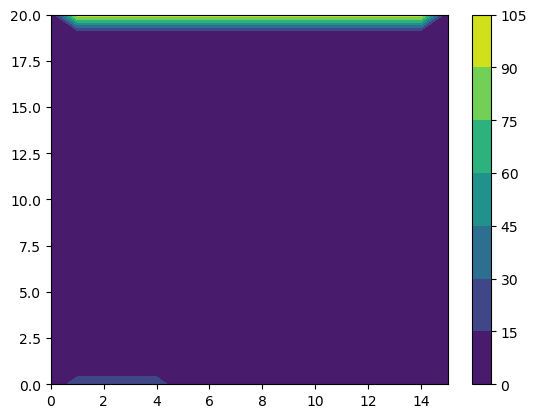

In [80]:
plt.contourf(X,Y,T)
plt.colorbar()

In [81]:
tolerancia  = 0.01
Error_aproximado = 100
while Error_aproximado > tolerancia:
    Tanterior = T.copy()
    for i in range(Nx):
        for j in range(Ny):
            if i == 0 and j!=0 and j!=Ny-1: # lado izquierdo
                T[j,i] = (2*T[j,i+1]-2*dx*dTdx[j,i]+T[j+1,i]+T[j-1,i])/4
            elif i == 0 and j == 0:
                T[j,i] = (2*T[j,i+1]-2*dx*dTdx[j,i]+2*T[j+1,i]-2*dy*dTdy[j,i])/4
            elif i == 0 and j==Ny-1:
                T[j,i] = (2*T[j,i+1]-2*dx*dTdx[j,i]+2*T[j-1,i]+2*dy*dTdy[j,i])/4
            elif j==0 and i == 5/dx:
                T[j,i] = (2*T[j,i-1]+2*dx*dTdx[j,i]+2*T[j+1,i]-2*dy*dTdy[j,i])/4
            elif i == Nx-1 and j == Ny-1:
                T[j,i] = (2*T[j,i-1]+2*dx*dTdx[j,i]+2*T[j-1,i]+2*dy*dTdy[j,i])/4
            elif i == Nx-1 and j > 10/dy and j < Ny-1:
                T[j,i] = (2*T[j,i-1]+2*dx*dTdx[j,i]+T[j+1,i]+T[j-1,i])/4
            elif i == 5/dx and j > 0 and j <= 5/dy:
                T[j,i] = (2*T[j,i-1]+2*dx*dTdx[j,i]+T[j+1,i]+T[j-1,i])/4
            elif j == (i-5/dx)*dx/(2*dy)+5/dy and i > 5/dx:
                T[j,i] = (2*T[j,i-1]+2*dx*dTdx[j,i]+2*T[j+1,i]-2*dy*dTdy[j,i])/4 
            elif i > 0 and i < 5/dx and j != Ny-1 and j > 0 :
                T[j,i] = (T[j,i+1]+T[j,i-1]+T[j+1,i]+T[j-1,i])/4
            elif i >= 5/dx and i < Nx-1 and j > (i-5/dx)*dx/(2*dy)+5/dy and j < Ny-1:
                T[j,i] = (T[j,i+1]+T[j,i-1]+T[j+1,i]+T[j-1,i])/4
    Error_aproximado = np.max(abs((T-Tanterior)))

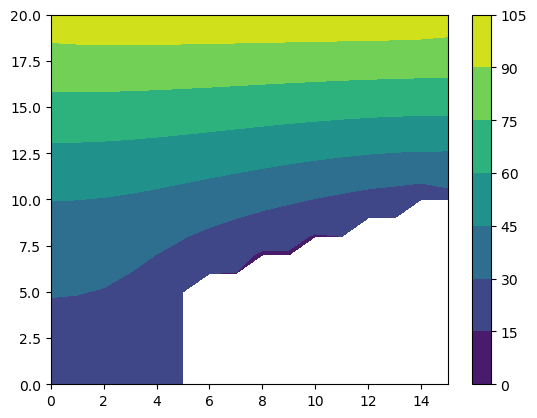

In [82]:
for i in range(Nx):
    for j in range(Ny):
        if j < (i-5/dx)*dx/(2*dy)+5/dy and i > 5/dx:
            T[j,i] = np.nan
plt.contourf(X,Y,T)
plt.colorbar()



In [83]:
T

array([[ 25.51310923,  25.        ,  25.        ,  25.        ,
         25.        ,  25.3435159 ,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [ 26.02832973,  25.8908875 ,  25.79339108,  25.70316909,
         25.64553524,  25.6889716 ,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [ 26.82566923,  26.74701208,  26.58455292,  26.37875017,
         26.19516072,  26.12452732,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [ 27.792147  ,  27.69514279,  27.42706625,  27.03995969,
         26.63956808,  26.42326122,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,  

In [84]:
# Flujos
# derivadas de x
for i in range(Nx):
    for j in range(Ny):
        if i > 0 and i < 5/dx:
            dTdx[j,i] = (T[j,i+1]-T[j,i-1])/(2*dx)
        elif i>=5/dx and i< Nx-1 and j > (i-5/dx)*dx/(2*dy)+5/dy and j < Ny:
            dTdx[j,i] = (T[j,i+1]-T[j,i-1])/(2*dx)

# derivadas de y
for i in range(Nx):
    for j in range(Ny):
        if i > 0 and i < 5/dx and j > 0 and j < Ny-1:
            dTdy[j,i] = (T[j+1,i]-T[j-1,i])/(2*dy)
        elif i >= 5/dx and i< Nx-1 and j > (i-5/dx)*dx/(2*dy)+5/dy and j < Ny - 1:
            dTdy[j,i] = (T[j+1,i]-T[j-1,i])/(2*dy)

qx = - k * dTdx
qy = - k * dTdy


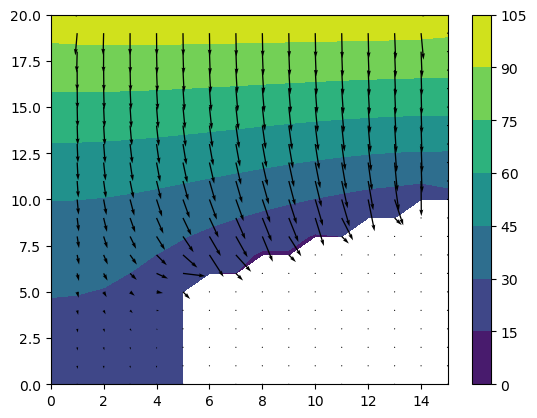

In [86]:
plt.contourf(X,Y,T)
plt.colorbar()
plt.quiver(x,y,qx,qy)

In [85]:
qx

array([[-0.00000000e+00,  1.28277308e-01, -0.00000000e+00,
        -0.00000000e+00, -8.58789758e-02, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-0.00000000e+00,  5.87346640e-02,  4.69296035e-02,
         3.69639602e-02,  3.54937315e-03, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-0.00000000e+00,  6.02790774e-02,  9.20654756e-02,
         9.73480493e-02,  6.35557137e-02, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-0.00000000e+00,  9.12701892e